In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
import casadi 


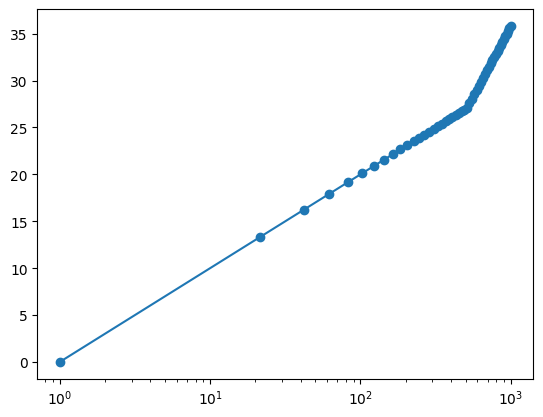

In [9]:

N = 50

x = np.linspace(1,1000,N)

y = np.log10(x)*10 

indx = x > 500
y[indx] += 2*(y[indx] - y[indx][0])
plt.semilogx(x,y,'o-')


This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        1

Total number of variables............................:        1
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.5917743e+04 0.00e+00 1.00e+02  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

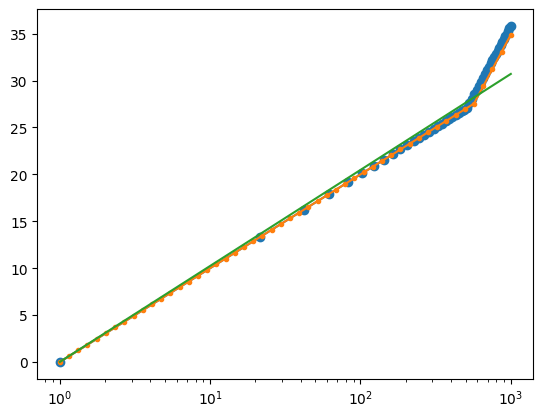

In [10]:

opti = casadi.Opti()

k = opti.variable()

xi = np.logspace(0,3,N)
yi = np.log10(xi)*10 

indx = xi > 500
yi[indx] += 2*(yi[indx] - yi[indx][0])

yhat = k*np.log10(xi)

J = 0
for i in range(len(y)):
    err = yhat[i] - yi[i]
    J += err**2


opti.minimize(J)

opti.solver('ipopt')
sol = opti.solve()

k_opt0 = sol.value(k)
print(k_opt0)

y0 = np.log10(x)*k_opt0

plt.semilogx(x,y,'o-')
plt.semilogx(xi,yi,'.-')
plt.semilogx(x,y0)

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        1

Total number of variables............................:        1
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  3.8684339e+04 0.00e+00 1.00e+02  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

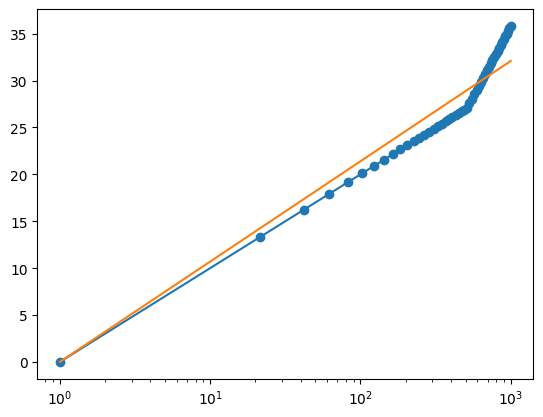

In [11]:

opti = casadi.Opti()

k = opti.variable()

yhat = k*np.log10(x)

J = 0
for i in range(len(y)):
    err = yhat[i] - y[i]
    J += err**2


opti.minimize(J)

opti.solver('ipopt')
sol = opti.solve()

k_opt1 = sol.value(k)
print(k_opt1)

y1 = np.log10(x)*k_opt1

plt.semilogx(x,y,'o-')
plt.semilogx(x,y1)

The x-axis distance at a specific point $\omega[i]$ in the bode plot is the derivative of $\log$, thus the error should be scaled

$J = \sum_i J_i \frac{1}{\omega_i}$

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        1

Total number of variables............................:        1
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0374496e+02 0.00e+00 2.01e+01  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

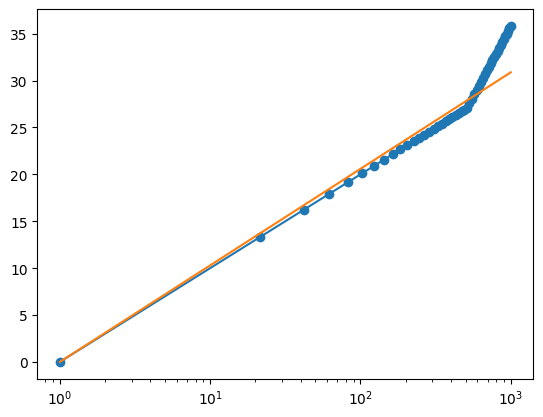

In [12]:
opti = casadi.Opti()

k = opti.variable()

yhat = k*np.log10(x)

J = 0
for i in range(len(y)):
    dw = 1/x[i]
    err = yhat[i] - y[i]
    J += dw*err**2


opti.minimize(J)

opti.solver('ipopt')
sol = opti.solve()

k_opt2 = sol.value(k)
print(k_opt2)

y2 = np.log10(x)*k_opt2

plt.semilogx(x,y,'o-')
plt.semilogx(x,y2)

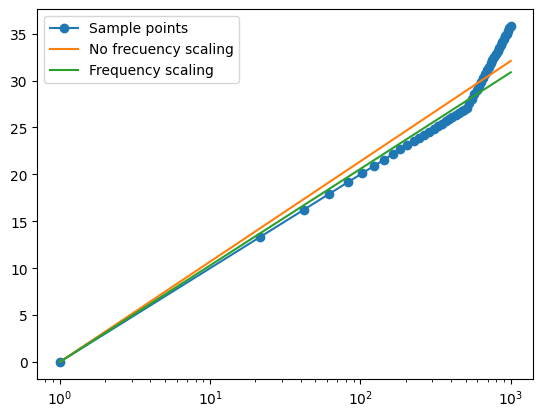

In [13]:
plt.semilogx(x,y,'o-',label='Sample points')
plt.semilogx(x,y1,label='No frecuency scaling')
plt.semilogx(x,y2,label='Frequency scaling')
plt.legend()